In [1]:
%load_ext watermark


In [2]:
from IPython.display import display, HTML
from hstrat import _auxiliary_lib as hstrat_aux
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from slugify import slugify
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib._calc_normed_defmut_clade_stats import (
    calc_normed_defmut_clade_stats,
)
from pylib._mask_sequence_diffs import mask_sequence_diffs
from pylib._screen_mutation_defined_nodes_sequence_diff import (
    screen_mutation_defined_nodes_sequence_diff,
)
from pylib._seed_global_rngs import seed_global_rngs


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-17T20:38:17.740964+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

numpy     : 2.1.2
seaborn   : 0.13.2
matplotlib: 3.9.2
teeplot   : 1.4.2
pandas    : 2.2.3
hstrat    : 1.20.11

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-16-vanilla-comparator"
teeplot_subdir


'2025-05-16-vanilla-comparator'

In [5]:
seed_global_rngs(1)


## Get Data


In [6]:
df = pd.read_parquet("https://osf.io/f4qaj/download").astype(
    {"origin_time": float},
)

df.head()


source  target  date        layer    variant sequence_focal  \
0   74486   74486     0  importation  Wildtype+              +   
1   72893   72893     0  importation  Wildtype+              +   
2   72971   72971     0  importation  Wildtype+              +   
3   73093   73093     0  importation  Wildtype+              +   
4   73103   73103     0  importation  Wildtype+              +   

    sequence_background  id  ancestor_id  origin_time  ... trt_seed  \
0  ++++++++++++++++++++   0            0          0.0  ...        0   
1  ++++++++++++++++++++   1            0          0.0  ...        0   
2  ++++++++++++++++++++   2            0          0.0  ...        0   
3  ++++++++++++++++++++   3            0          0.0  ...        0   
4  ++++++++++++++++++++   4            0          0.0  ...        0   

  SLURM_JOB_ID  SLURM_ARRAY_JOB_ID  SLURM_ARRAY_TASK_ID  \
0     56412948            56412946                    0   
1     56412948            56412946                    0   
2     56412948            56412946                    0   
3     56412948            56412946                    0   
4     56412948            56412946                    0   

   SLURM_ARRAY_TASK_COUNT SLURM_ARRAY_TASK_MAX  SLURM_ARRAY_TASK_MIN  \
0                      15                   14                     0   
1                      15                   14                     0   
2                      15                   14                     0   
3                      15                   14                     0   
4                      15                   14                     0   

                         replicate_uuid  py_random_sample1  np_random_sample1  
0  f4ba679c-1205-8a4a-a1fd-e976d05e57ba         3626764237         2357136044  
1  f4ba679c-1205-8a4a-a1fd-e976d05e57ba         3626764237         2357136044  
2  f4ba679c-1205-8a4a-a1fd-e976d05e57ba         3626764237         2357136044  
3  f4ba679c-1205-8a4a-a1fd-e976d05e57ba         3626764237         2357136044  
4  f4ba679c-1205-8a4a-a1fd-e976d05e57ba         3626764237         2357136044  

[5 rows x 48 columns]

In [7]:
def stripboxen_plot(
    data: pd.DataFrame,
    x: str,
    y: str,
    hue: str
) -> plt.Axes:
    ax = sns.boxenplot(
        data=data,
        y=y,
        x=x,
        hue=hue,
        legend=False,
    )
    sns.barplot(
        data=data,
        y=y,
        x=x,
        hue=hue,
        alpha=0.0,
        ax=ax,
        legend=False,
    )
    sns.stripplot(
        y=data[y] + np.random.uniform(-1, 1, len(data)),
        x=data[x],
        alpha=0.2,
        ax=ax,
        color="k",
        legend=False,
        jitter=0.3,
        size=4,
    )
    return ax


enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.0039365291595458984}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0001976490020751953}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0017917156219482422}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 4.315376281738281e-05}
ancestral_sequence[0]='+' 
int(mut_unique[0])=39
int(mut_unique[0] >> 8)=0
chr(mut_unique[0] & 0xFF)="'"
int(mut_counts[0])=8522
int(mut_counts[0]) / len(sequence_diffs)=0.07200919338211684
enter log_context_duration for is_valid_mut
is_valid_mut[0]=True
(mut_counts[is_valid_mut] < mut_counts[0]).mean()=0.9523809523809523
exit log_context_duration for is_valid_mut
!!! {"is_valid_mut": 0.00030922889709472656}
len(is_valid_mut)=21 is_valid_mut.sum()=21 is_valid_mut[0]=True
enter log_context_durati

100%|██████████| 7/7 [00:21<00:00,  3.07s/it]


teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-num-leaves+ext=.png


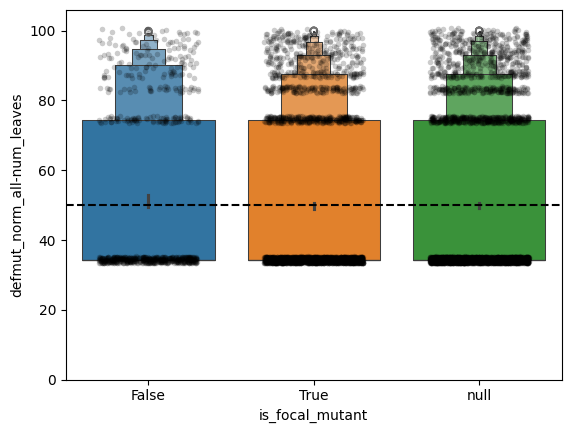

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-num-leaves+ext=.png


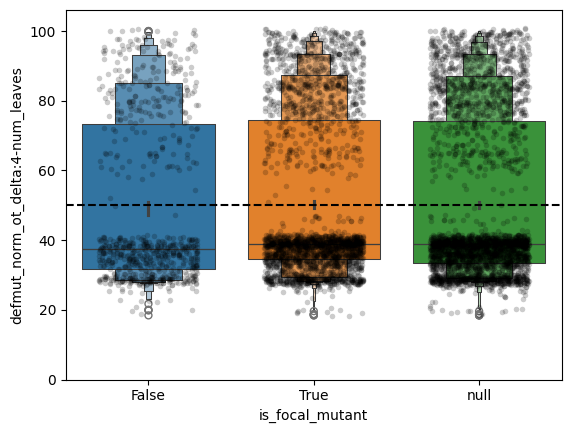

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-num-leaves+ext=.png


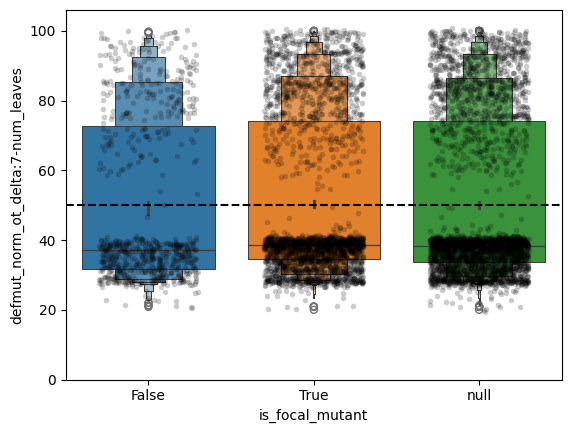

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-num-leaves+ext=.png


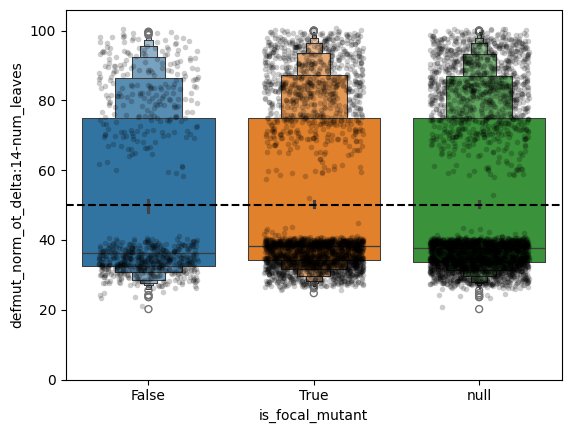

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-num-leaves+ext=.png


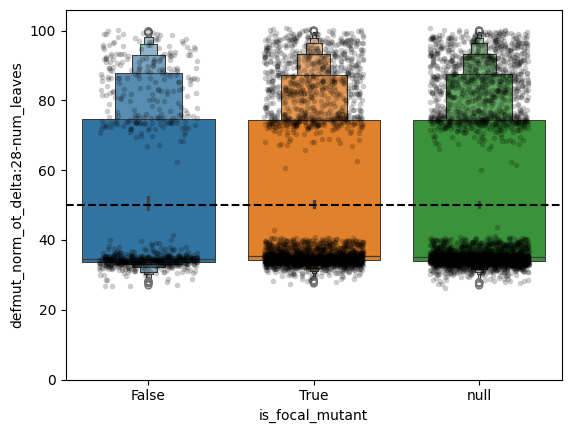

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-num-leaves+ext=.png


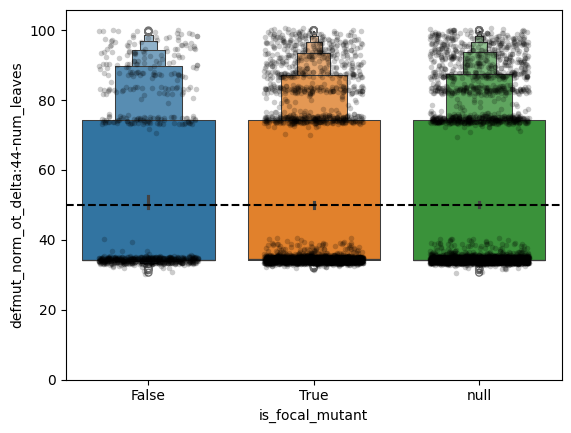

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-num-leaves+ext=.png


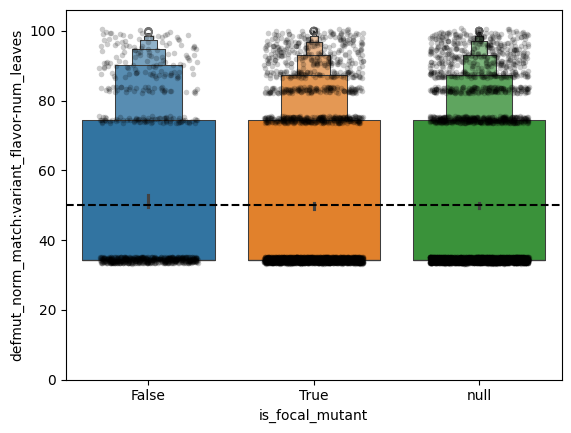

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-clade-duration+ext=.png


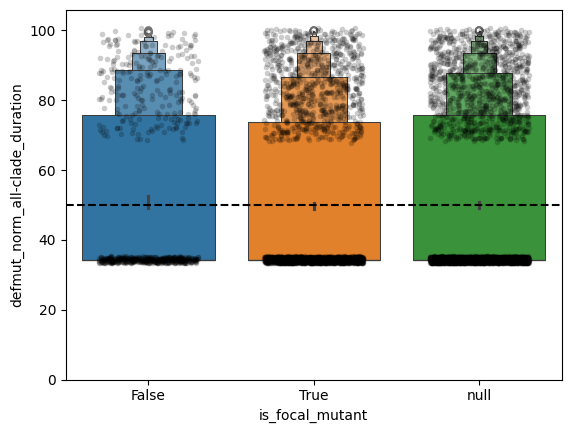

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-clade-duration+ext=.png


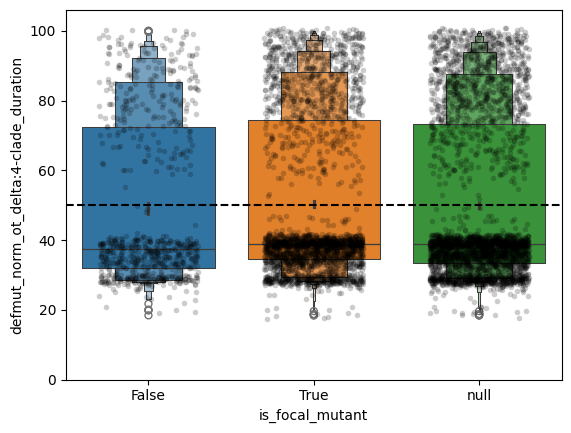

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-clade-duration+ext=.png


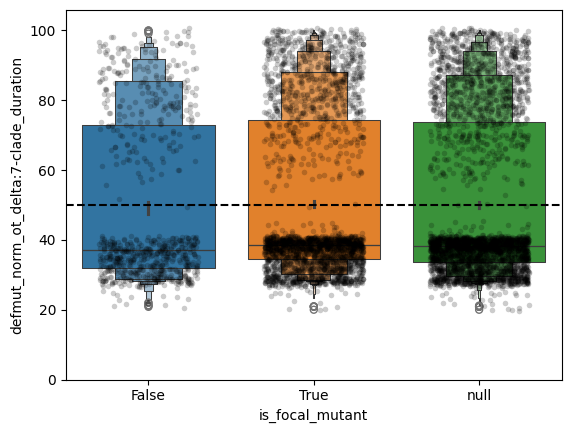

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-clade-duration+ext=.png


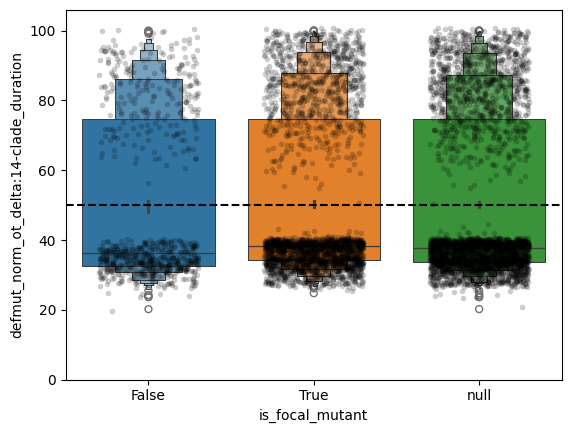

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-clade-duration+ext=.png


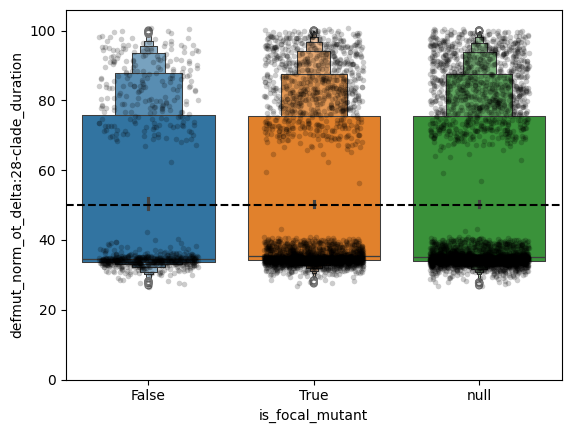

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-clade-duration+ext=.png


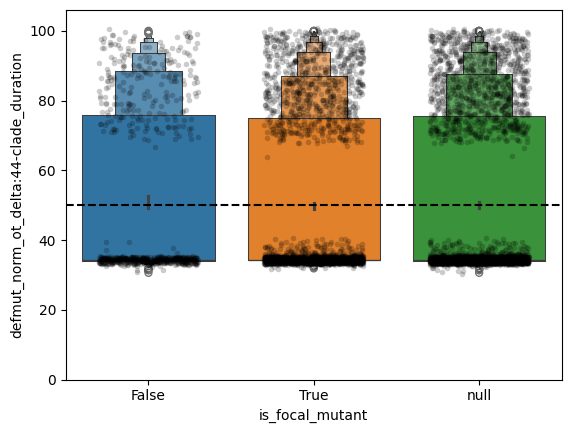

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-clade-duration+ext=.png


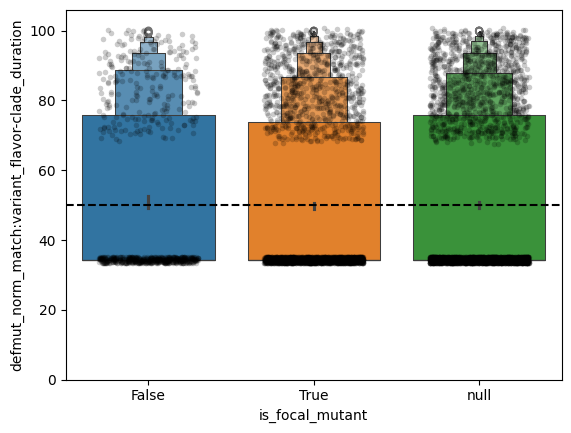

enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.0034263134002685547}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.00016951560974121094}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00013303756713867188}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 7.033348083496094e-05}
ancestral_sequence[0]='+' 
int(mut_unique[0])=39
int(mut_unique[0] >> 8)=0
chr(mut_unique[0] & 0xFF)="'"
int(mut_counts[0])=2782
int(mut_counts[0]) / len(sequence_diffs)=0.023898290524868998
enter log_context_duration for is_valid_mut
is_valid_mut[0]=True
(mut_counts[is_valid_mut] < mut_counts[0]).mean()=0.9523809523809523
exit log_context_duration for is_valid_mut
!!! {"is_valid_mut": 0.00022649765014648438}
len(is_valid_mut)=21 is_valid_mut.sum()=21 is_valid_mut[0]=True
enter log_context_dur

 96%|█████████▌| 2116/2209 [00:01<00:00, 1253.50it/s]/usr/local/lib/python3.10/dist-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 96%|█████████▌| 2117/2209 [00:01<00:00, 1240.14it/s]/usr/local/lib/python3.10/dist-packages/numpy/_co

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-num-leaves+ext=.png


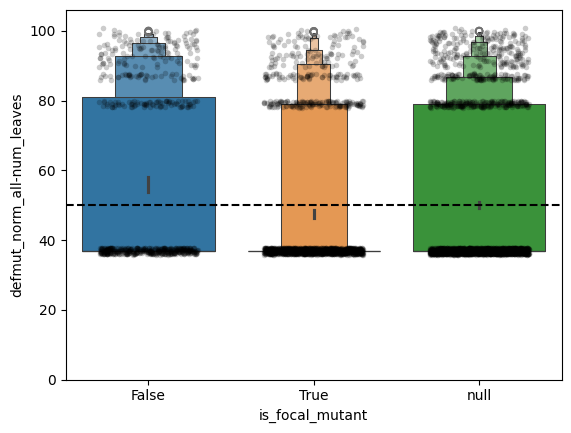

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-num-leaves+ext=.png


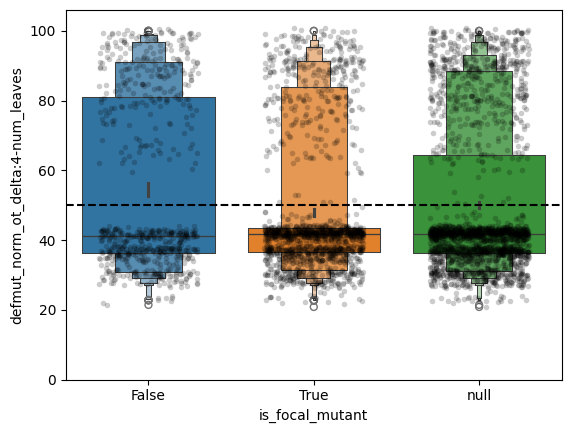

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-num-leaves+ext=.png


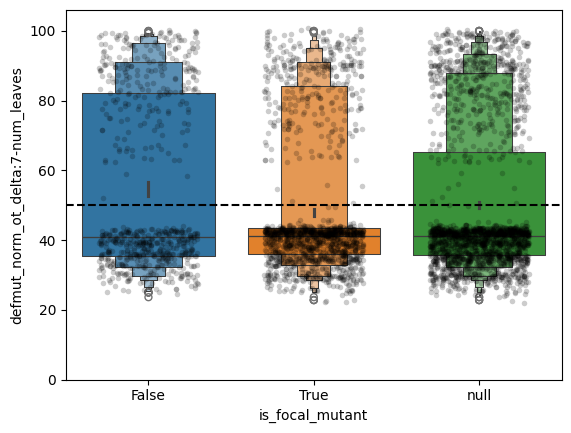

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-num-leaves+ext=.png


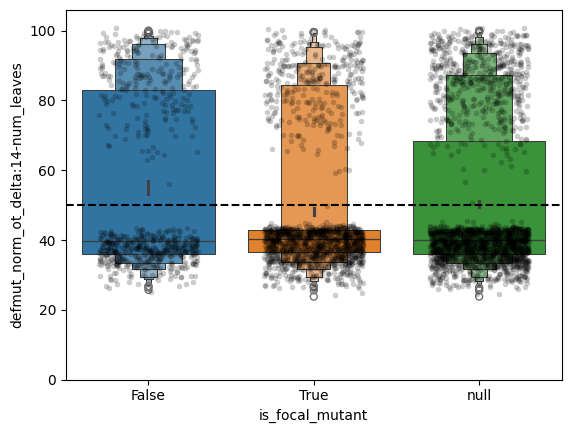

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-num-leaves+ext=.png


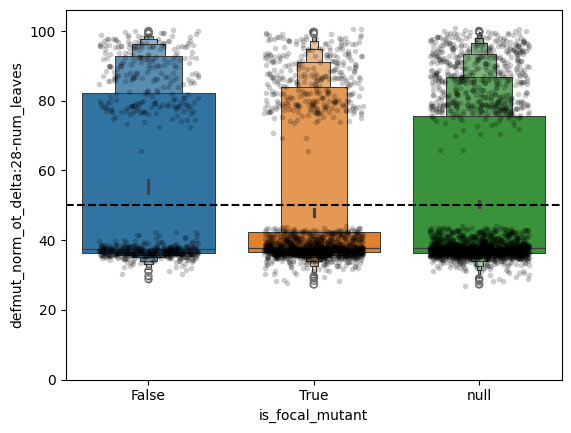

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-num-leaves+ext=.png


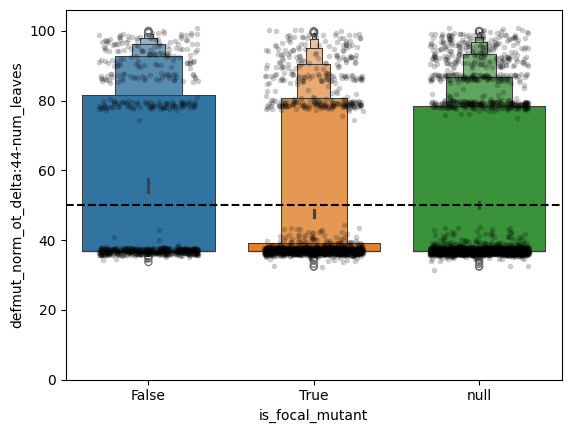

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-num-leaves+ext=.png


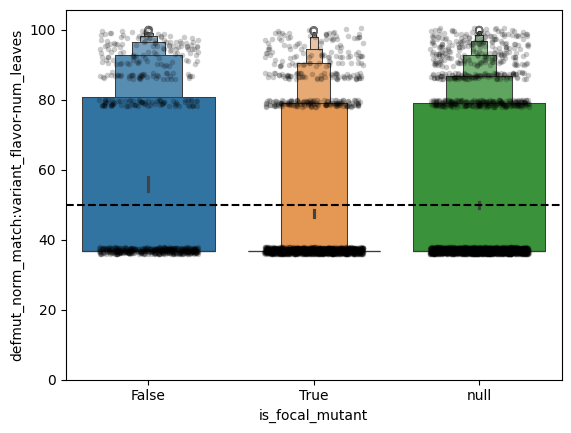

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-clade-duration+ext=.png


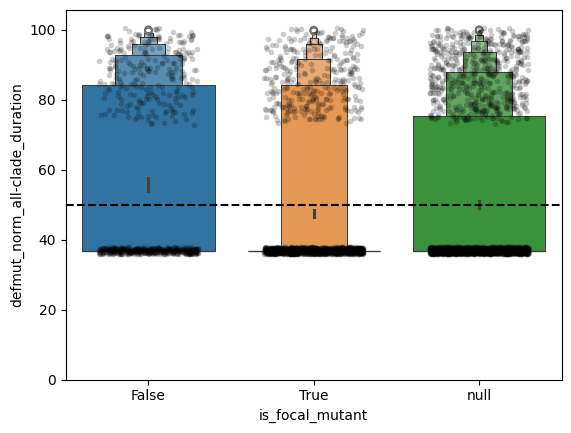

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-clade-duration+ext=.png


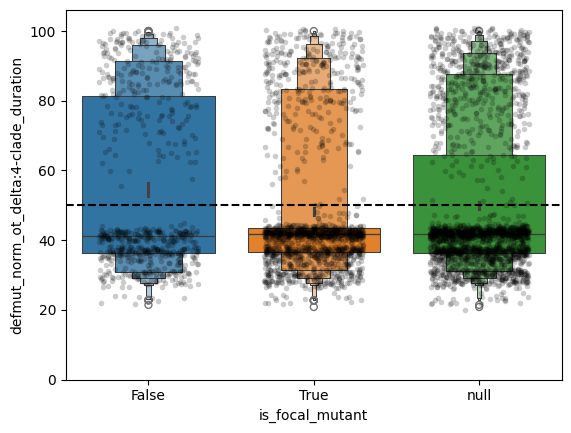

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-clade-duration+ext=.png


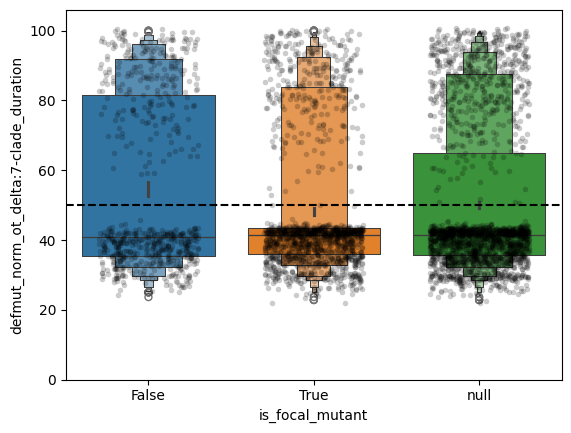

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-clade-duration+ext=.png


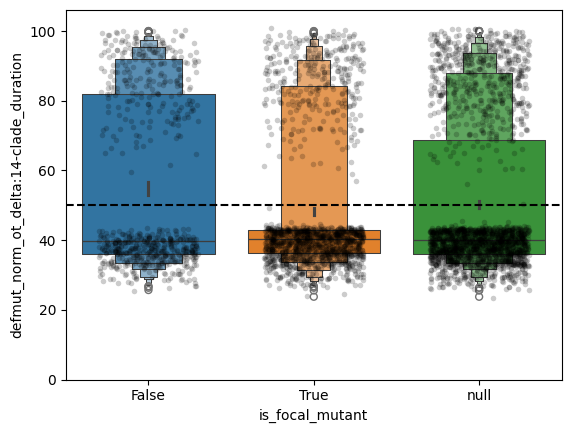

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-clade-duration+ext=.png


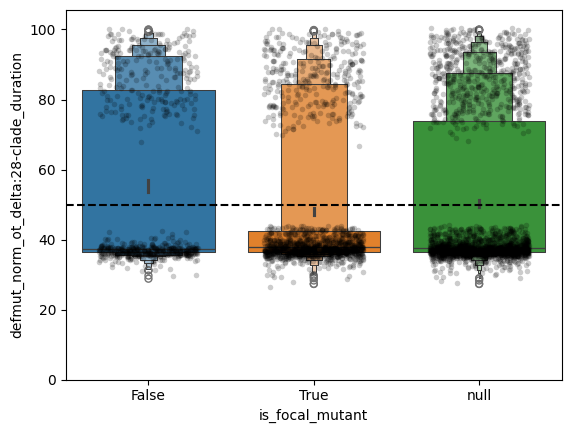

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-clade-duration+ext=.png


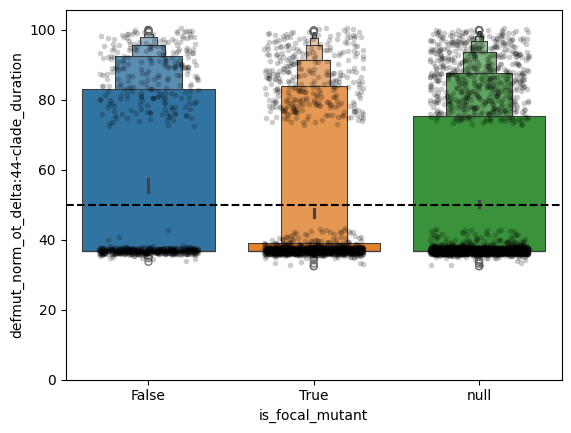

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sben-gdel+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-clade-duration+ext=.png


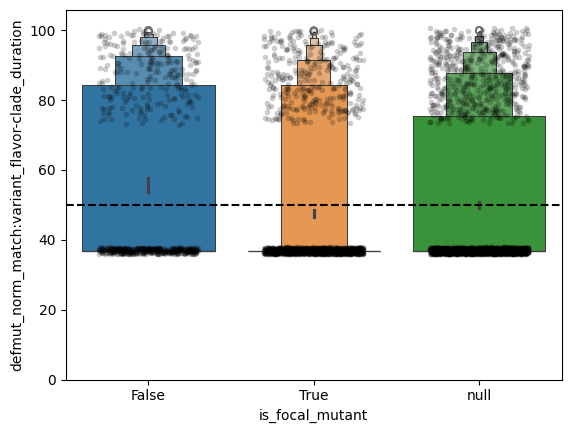

enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.0035457611083984375}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.00019240379333496094}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00013875961303710938}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 4.7206878662109375e-05}
ancestral_sequence[0]='+' 
int(mut_unique[0])=39
int(mut_unique[0] >> 8)=0
chr(mut_unique[0] & 0xFF)="'"
int(mut_counts[0])=110
int(mut_counts[0]) / len(sequence_diffs)=0.000933992222392039
enter log_context_duration for is_valid_mut
is_valid_mut[0]=True
(mut_counts[is_valid_mut] < mut_counts[0]).mean()=0.0
exit log_context_duration for is_valid_mut
!!! {"is_valid_mut": 0.00022029876708984375}
len(is_valid_mut)=21 is_valid_mut.sum()=21 is_valid_mut[0]=True
enter log_context_duration for indic

  0%|          | 0/955 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)

100%|██████████| 7/7 [00:05<00:00,  1.28it/s]


teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-num-leaves+ext=.png


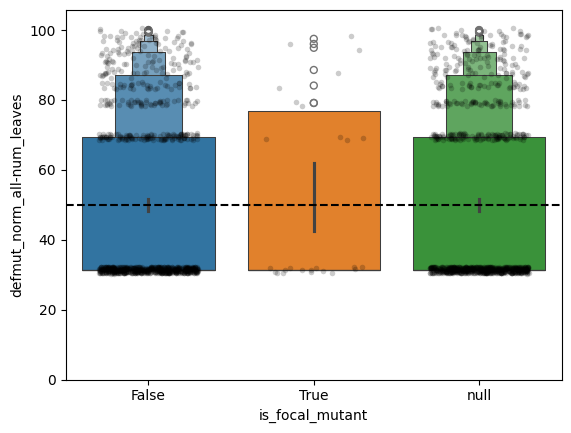

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-num-leaves+ext=.png


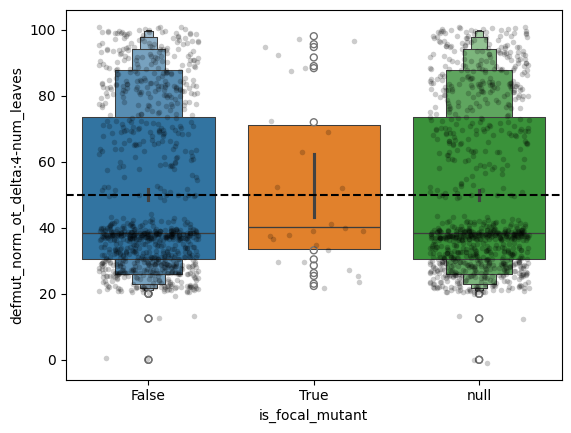

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-num-leaves+ext=.png


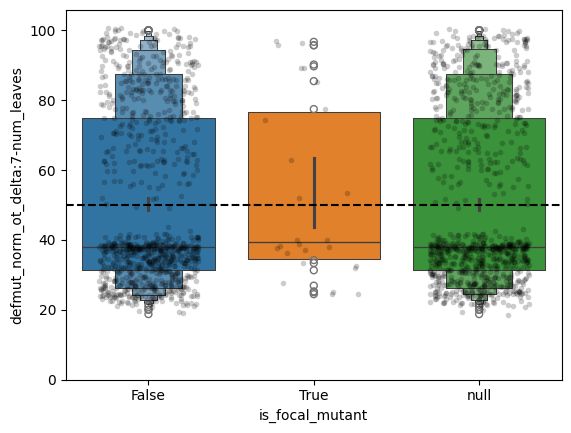

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-num-leaves+ext=.png


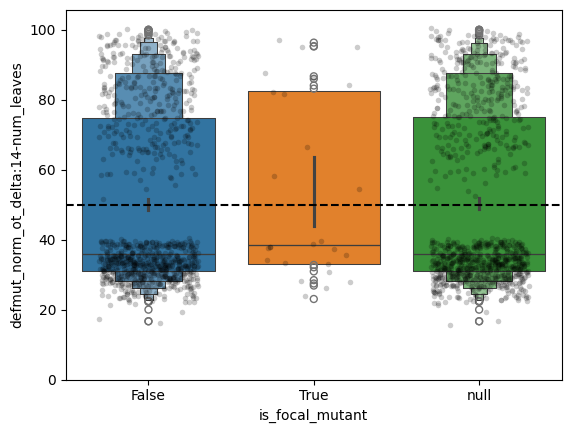

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-num-leaves+ext=.png


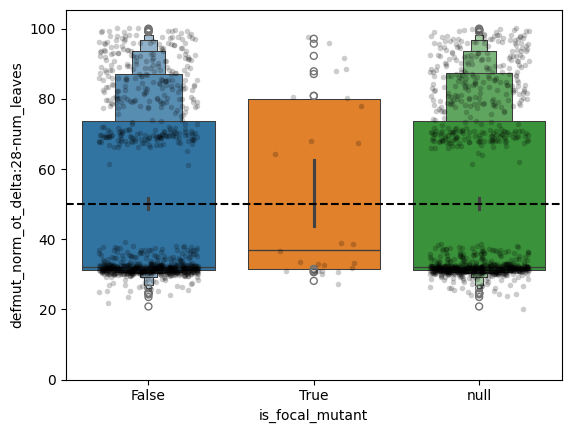

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-num-leaves+ext=.png


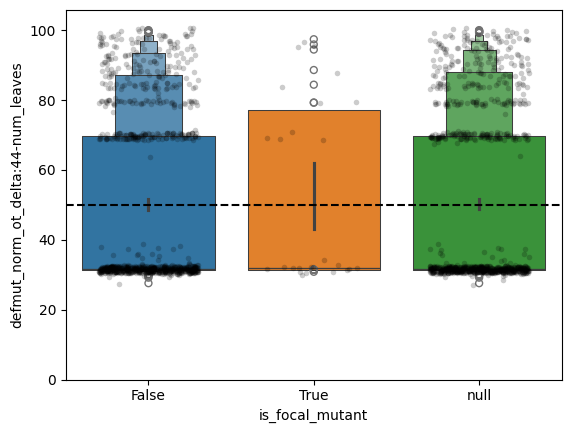

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-num-leaves+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-num-leaves+ext=.png


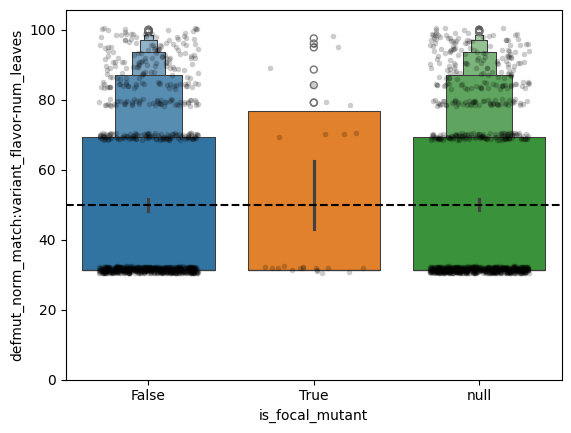

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-all-clade-duration+ext=.png


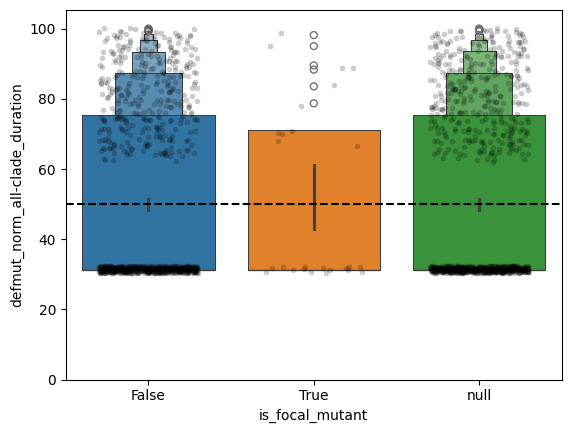

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-4-clade-duration+ext=.png


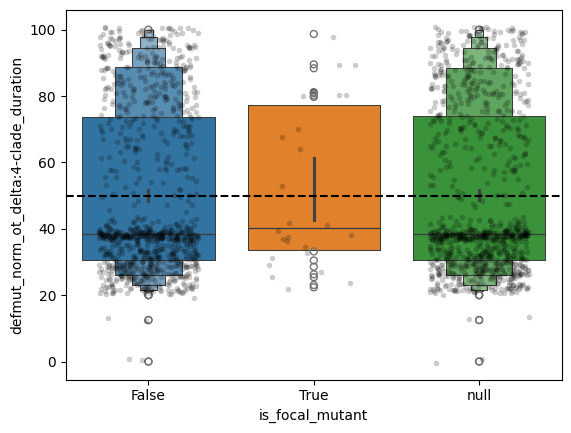

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-7-clade-duration+ext=.png


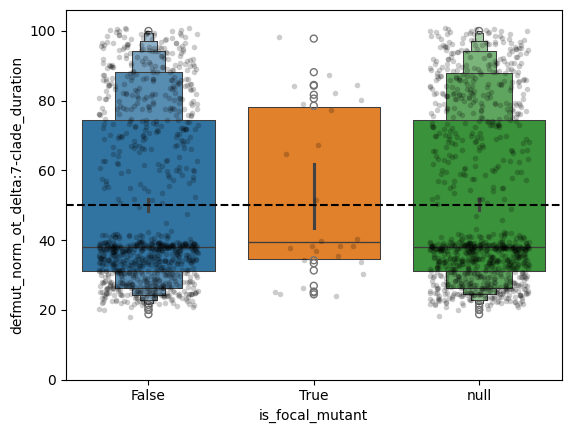

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-14-clade-duration+ext=.png


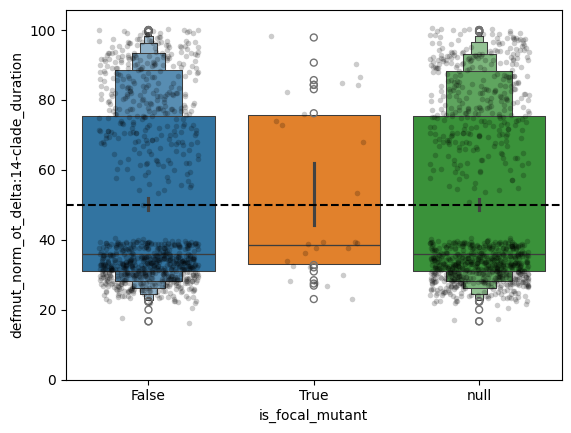

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-28-clade-duration+ext=.png


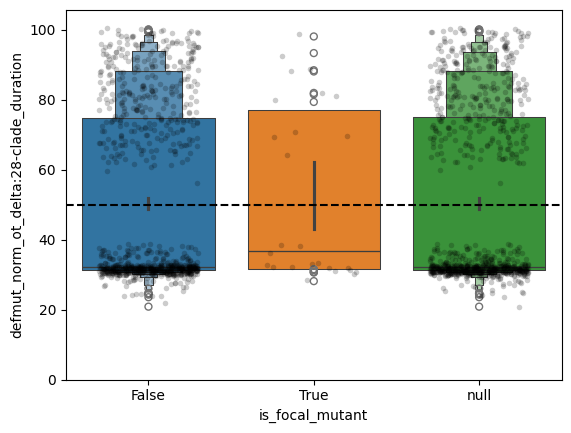

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-ot-delta-44-clade-duration+ext=.png


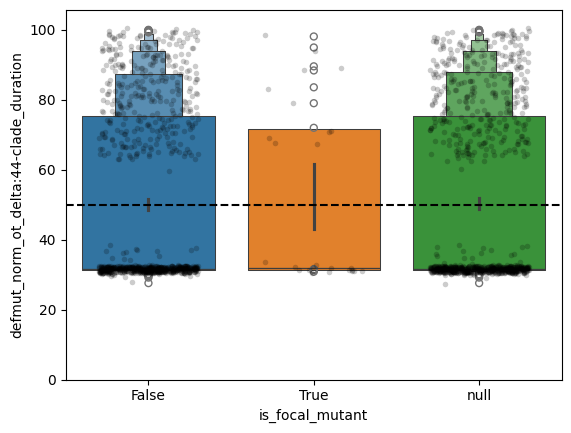

teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-clade-duration+ext=.pdf
teeplots/2025-05-16-vanilla-comparator/hue=is-focal-mutant+trt_name=sneu-gneu+viz=stripboxen-plot+x=is-focal-mutant+y=defmut-norm-match-variant-flavor-clade-duration+ext=.png


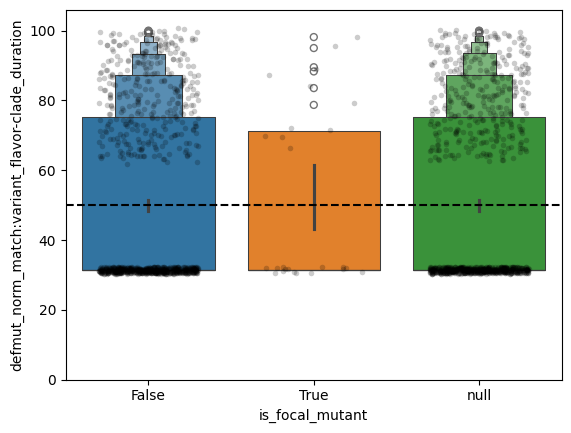

In [8]:
for trt_name, group in df.groupby("trt_name", observed=True):
    dfx = group[
        (group["replicate_uuid"] == group["replicate_uuid"].unique()[0])
    ]
    dfx = hstrat_aux.alifestd_to_working_format(dfx).reset_index(drop=True)

    # yield (mut_char_pos, mut_char_ref, mut_char_var), mut_mask
    mutations = mask_sequence_diffs(
        ancestral_sequence=dfx["ancestral_sequence"].astype(str).unique().item(),
        sequence_diffs=dfx["sequence_diff"],
        sparsify_mask=False,
    )
    mutations = [*mutations]

    defining_masks = {
        (mut_char_pos, mut_char_ref, mut_char_var): screen_mutation_defined_nodes_sequence_diff(
            phylo_df=dfx,
            mut_char_pos=mut_char_pos,
            mut_char_var=mut_char_var,
        )
        for (mut_char_pos, mut_char_ref, mut_char_var), mut_mask in mutations
    }
    dfx["is_focal_mutant"] = next(iter(defining_masks.values()))

    dfx = calc_normed_defmut_clade_stats(
        phylo_df=dfx,
        defmut_clade_masks=defining_masks,
        match_cols=["variant_flavor"],
        ot_deltas=(4, 7, 14, 28, 44),
        progress_wrap=tqdm,
    )

    dfx_ = dfx.copy()
    dfx_["is_focal_mutant"] = "null"
    data = pd.concat([dfx, dfx_], ignore_index=True)

    for y in (
        "defmut_norm_all-num_leaves",
        "defmut_norm_ot_delta:4-num_leaves",
        "defmut_norm_ot_delta:7-num_leaves",
        "defmut_norm_ot_delta:14-num_leaves",
        "defmut_norm_ot_delta:28-num_leaves",
        "defmut_norm_ot_delta:44-num_leaves",
        "defmut_norm_match:variant_flavor-num_leaves",
        "defmut_norm_all-clade_duration",
        "defmut_norm_ot_delta:4-clade_duration",
        "defmut_norm_ot_delta:7-clade_duration",
        "defmut_norm_ot_delta:14-clade_duration",
        "defmut_norm_ot_delta:28-clade_duration",
        "defmut_norm_ot_delta:44-clade_duration",
        "defmut_norm_match:variant_flavor-clade_duration",
    ):
        display(HTML(f"<h2>{trt_name} {y}</h2>"))
        with tp.teed(
            stripboxen_plot,
            data=data,
            x="is_focal_mutant",
            y=y,
            hue="is_focal_mutant",
            teeplot_outattrs={
                "trt_name": slugify(trt_name),
            },
            teeplot_subdir=teeplot_subdir,
        ) as teed:
            teed.axhline(50, color="k", linestyle="--")
